Load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

listing = pd.read_csv('C:/Users/HP/Downloads/listing (1).csv')
listing.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,75590,Amazing nature location by a lake,397766,Peter,NaN,Skarpnäcks,59.30117,18.12833,Entire home/apt,949,30,10,2016-07-08,0.09,1,178,0,NaN
1,109193,Live by the ocean,564237,Lennart,NaN,Östermalms,59.31640,18.16112,Entire home/apt,1800,10,31,2022-07-10,0.24,1,0,1,NaN
2,149587,Modern house 15min from city centre,721536,Teymur,NaN,Rinkeby-Tensta,59.40250,17.98828,Entire home/apt,1966,4,10,2019-08-20,0.08,1,261,0,NaN
3,164448,Double room in central Stockholm with Wi-Fi,784312,Li,NaN,Södermalms,59.31389,18.06087,Private room,864,3,345,2022-09-13,2.54,2,163,27,NaN
4,170651,Petit Charm Rooftop next to heaven,814021,Marie,NaN,Södermalms,59.31702,18.02946,Entire home/apt,957,4,41,2022-05-30,0.30,1,223,4,NaN


Exploring data

In [2]:
#Explore all columns in the listing dataset
listing.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

Check NaN and drop uneccesary columns

In [3]:
NaN = []
df = pd.DataFrame(listing.columns)
for col in listing:
  NaN.append(listing[col].isna().sum())
df['NaN'] = NaN
print(df)
columns_drop = ['neighbourhood_group', 'license']
listing_new = listing.drop(columns = columns_drop)
listing_new = listing_new.reset_index()

listing_new.duplicated().sum()
listing_new.info()


                                 0   NaN
0                               id     0
1                             name     2
2                          host_id     0
3                        host_name     0
4              neighbourhood_group  3990
5                    neighbourhood     0
6                         latitude     0
7                        longitude     0
8                        room_type     0
9                            price     0
10                  minimum_nights     0
11               number_of_reviews     0
12                     last_review   680
13               reviews_per_month   680
14  calculated_host_listings_count     0
15                availability_365     0
16           number_of_reviews_ltm     0
17                         license  3990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3990 entries, 0 to 3989
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  

Location map

C:\Users\HP\AppData\Local\Temp\ipykernel_6776\489117650.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1256: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


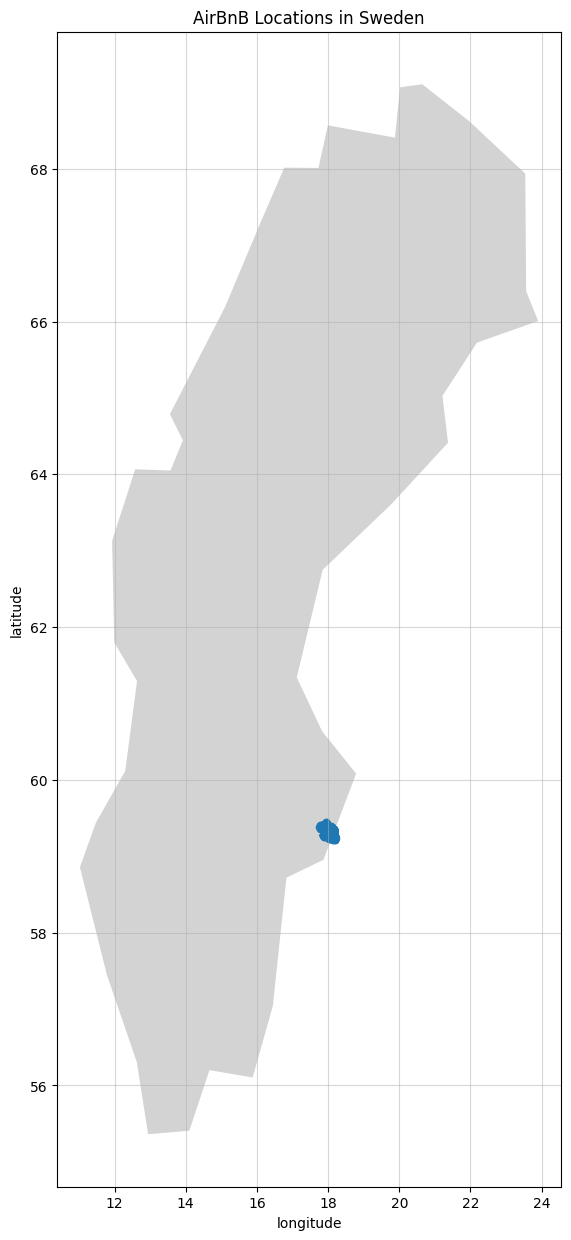

In [5]:
# initialize an axis
fig, ax = plt.subplots(figsize=(20,15))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Sweden"].plot(color="lightgrey", ax=ax)
# plot points
listing_new.plot(x="longitude", y="latitude", kind="scatter", 
        colormap="YlOrRd", 
        title= "AirBnB Locations in Sweden", 
        ax = ax)
# add grid
ax.grid(alpha=0.5)
plt.show()


Data preprocessing

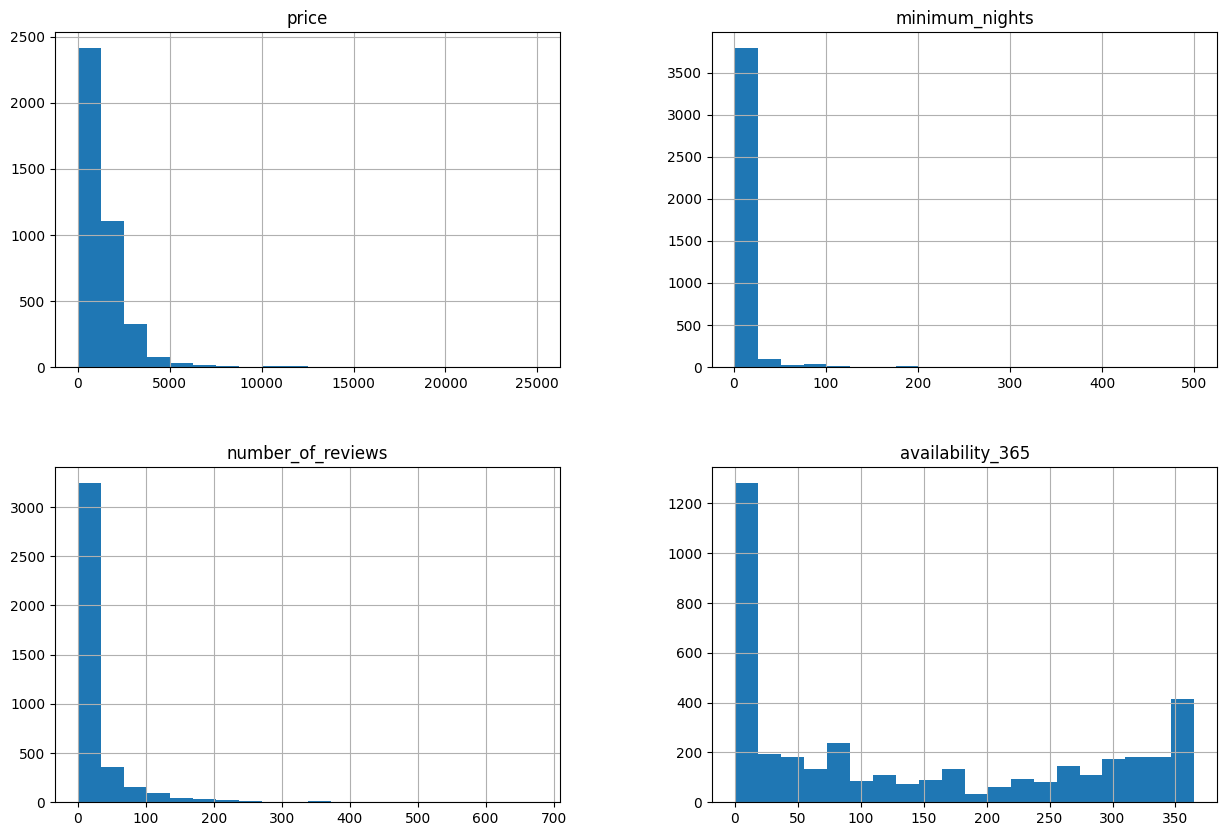

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_level,Reliability_based_on_Reviews,Availability_status
0,0,75590,Amazing nature location by a lake,397766,Peter,Skarpnäcks,59.30117,18.12833,Entire home/apt,949,30,10,2016-07-08,0.09,1,178,0,Low,Unreliable,High availablility
1,1,109193,Live by the ocean,564237,Lennart,Östermalms,59.31640,18.16112,Entire home/apt,1800,10,31,2022-07-10,0.24,1,0,1,Medium,Reliable,Unavailable
2,2,149587,Modern house 15min from city centre,721536,Teymur,Rinkeby-Tensta,59.40250,17.98828,Entire home/apt,1966,4,10,2019-08-20,0.08,1,261,0,Medium,Unreliable,High availablility
3,3,164448,Double room in central Stockholm with Wi-Fi,784312,Li,Södermalms,59.31389,18.06087,Private room,864,3,345,2022-09-13,2.54,2,163,27,Low,Reliable,High availablility
4,4,170651,Petit Charm Rooftop next to heaven,814021,Marie,Södermalms,59.31702,18.02946,Entire home/apt,957,4,41,2022-05-30,0.30,1,223,4,Low,Reliable,High availablility


In [6]:
#Create columns
listing_new['price'].describe()
listing_new.loc[:,['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].hist(figsize=(15,10), bins = 20)
plt.show()

#Based on descriptive statistics table
def price_level(price):
  if 0 <= price <= 700:
    return 'Very low'
  elif 700 < price <= 1100 :
    return 'Low'
  elif 1100 < price <= 2000:
    return 'Medium'
  elif 2000 < price <= 5000:
    return 'High'
  else:
    return 'Very high'

def review_count(review):
  if review <= 20:
    return 'Unreliable'
  else:
    return 'Reliable'

def avail(availability):
  if availability == 0:
    return 'Unavailable'
  elif 0 < availability <= 30:
    return 'Available for 1 month'
  elif 30 < availability <= 125:
    return 'Available for 1 quarter'
  else:
    return 'High availablility'

#Price level
listing_new['price_level'] = listing_new['price'].apply(price_level)

#Reliability 
listing_new['Reliability_based_on_Reviews'] = listing_new['number_of_reviews'].apply(review_count)

#Availability
listing_new['Availability_status'] = listing_new['availability_365'].apply(avail)


listing_new.head()


Detect outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_6776\214218863.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


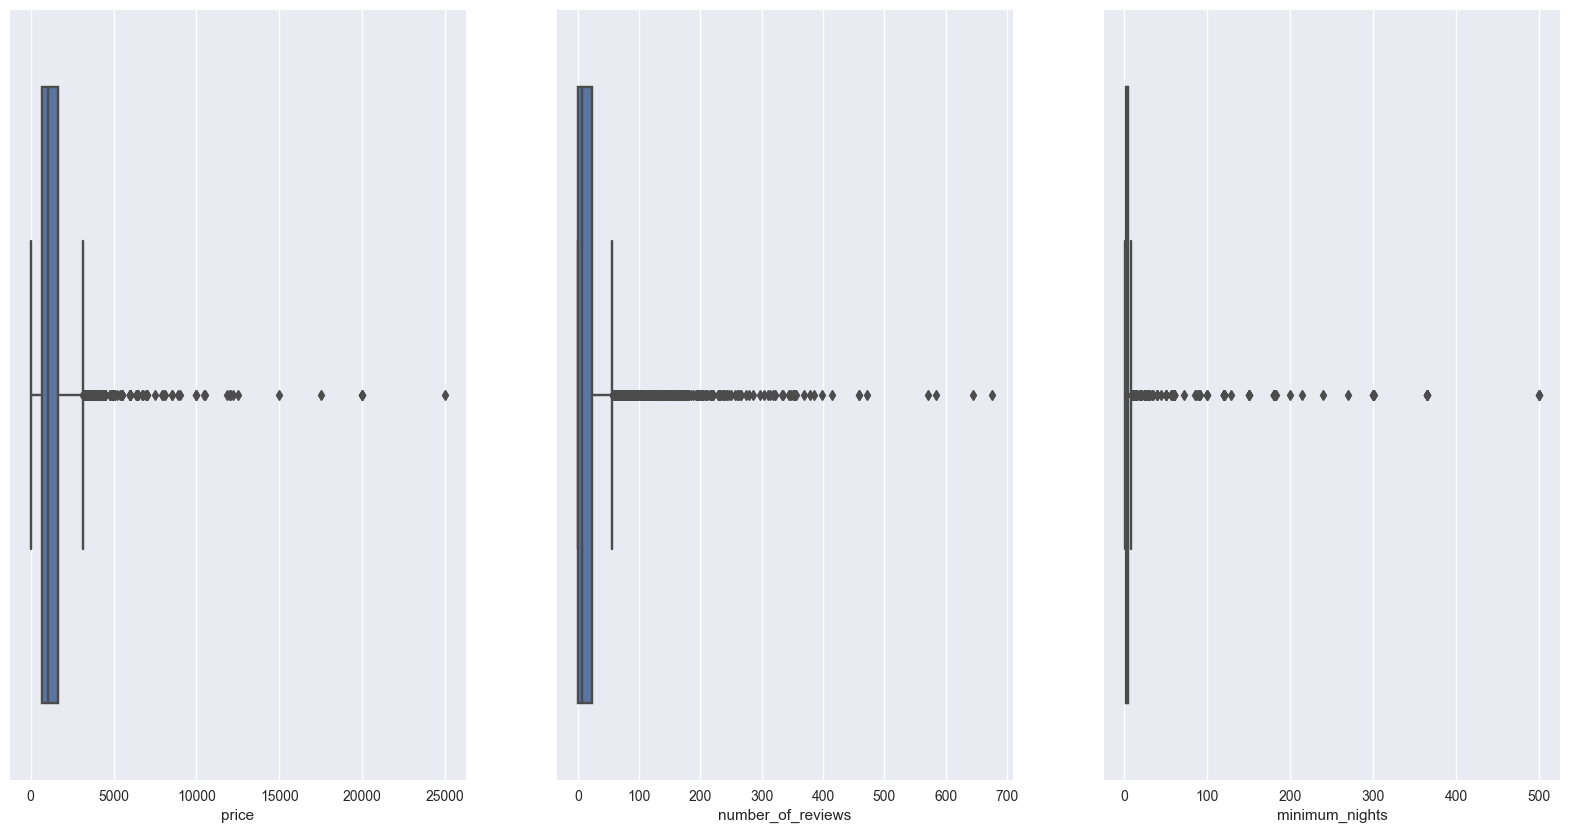

(3508, 20)

In [7]:
plt.style.use('seaborn')


plt.figure(figsize=(20, 10))

plt.subplot(131)
price = listing_new['price'].reset_index()
sns.boxplot(data=price, x = 'price')

plt.subplot(132)
reviews = listing_new['number_of_reviews'].reset_index()
sns.boxplot(data=reviews, x = 'number_of_reviews')

plt.subplot(133)
nights = listing_new['minimum_nights'].reset_index()
sns.boxplot(data=nights, x = 'minimum_nights')

plt.show()

listing_new[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()
def detect_outlier(column):
  Q1 = listing_new[column].quantile(0.25)
  Q3 = listing_new[column].quantile(0.75)
  Inter_quantile_range = Q3-Q1
  lower_whisker = Q1 - 1.5*Inter_quantile_range
  upper_whisker = Q3 + 1.5*Inter_quantile_range
  return listing_new[(lower_whisker < listing_new[column]) & (listing_new[column] < upper_whisker)]

for column in ['price','number_of_reviews']:
  listing_new_drop_outlier = detect_outlier(column)
listing_new_drop_outlier.shape

#The main focus here is the average value, outliers did not affect the analysis --> skip outlier analysis 


Heatmap to check correlation

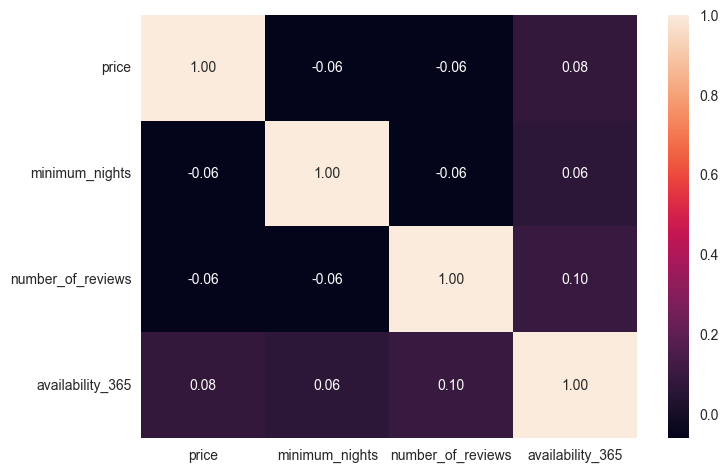

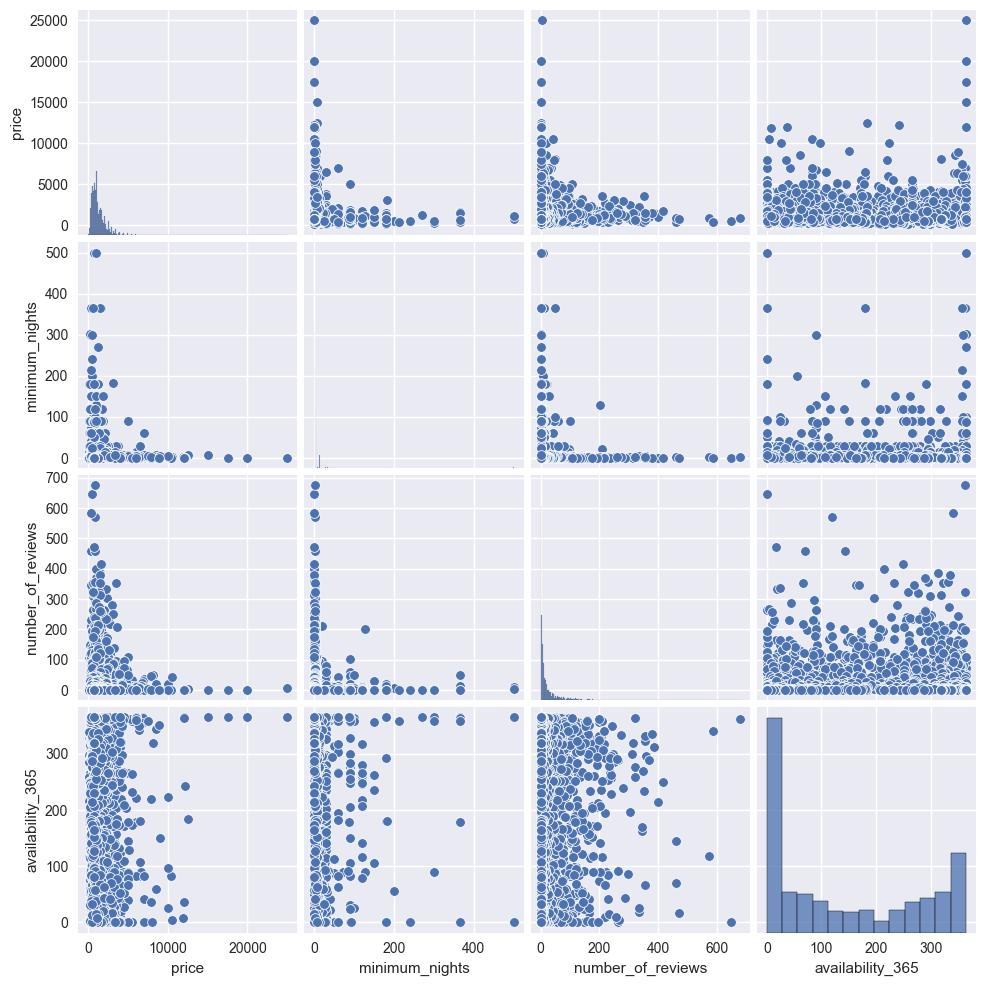

In [8]:
df = listing_new[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']]
sns.heatmap(data=df.corr(), annot=True, fmt='.2f');
##Variables seem to be uncorrelated with the others as the correlation is very low

sns.pairplot(data=df)


Visualization

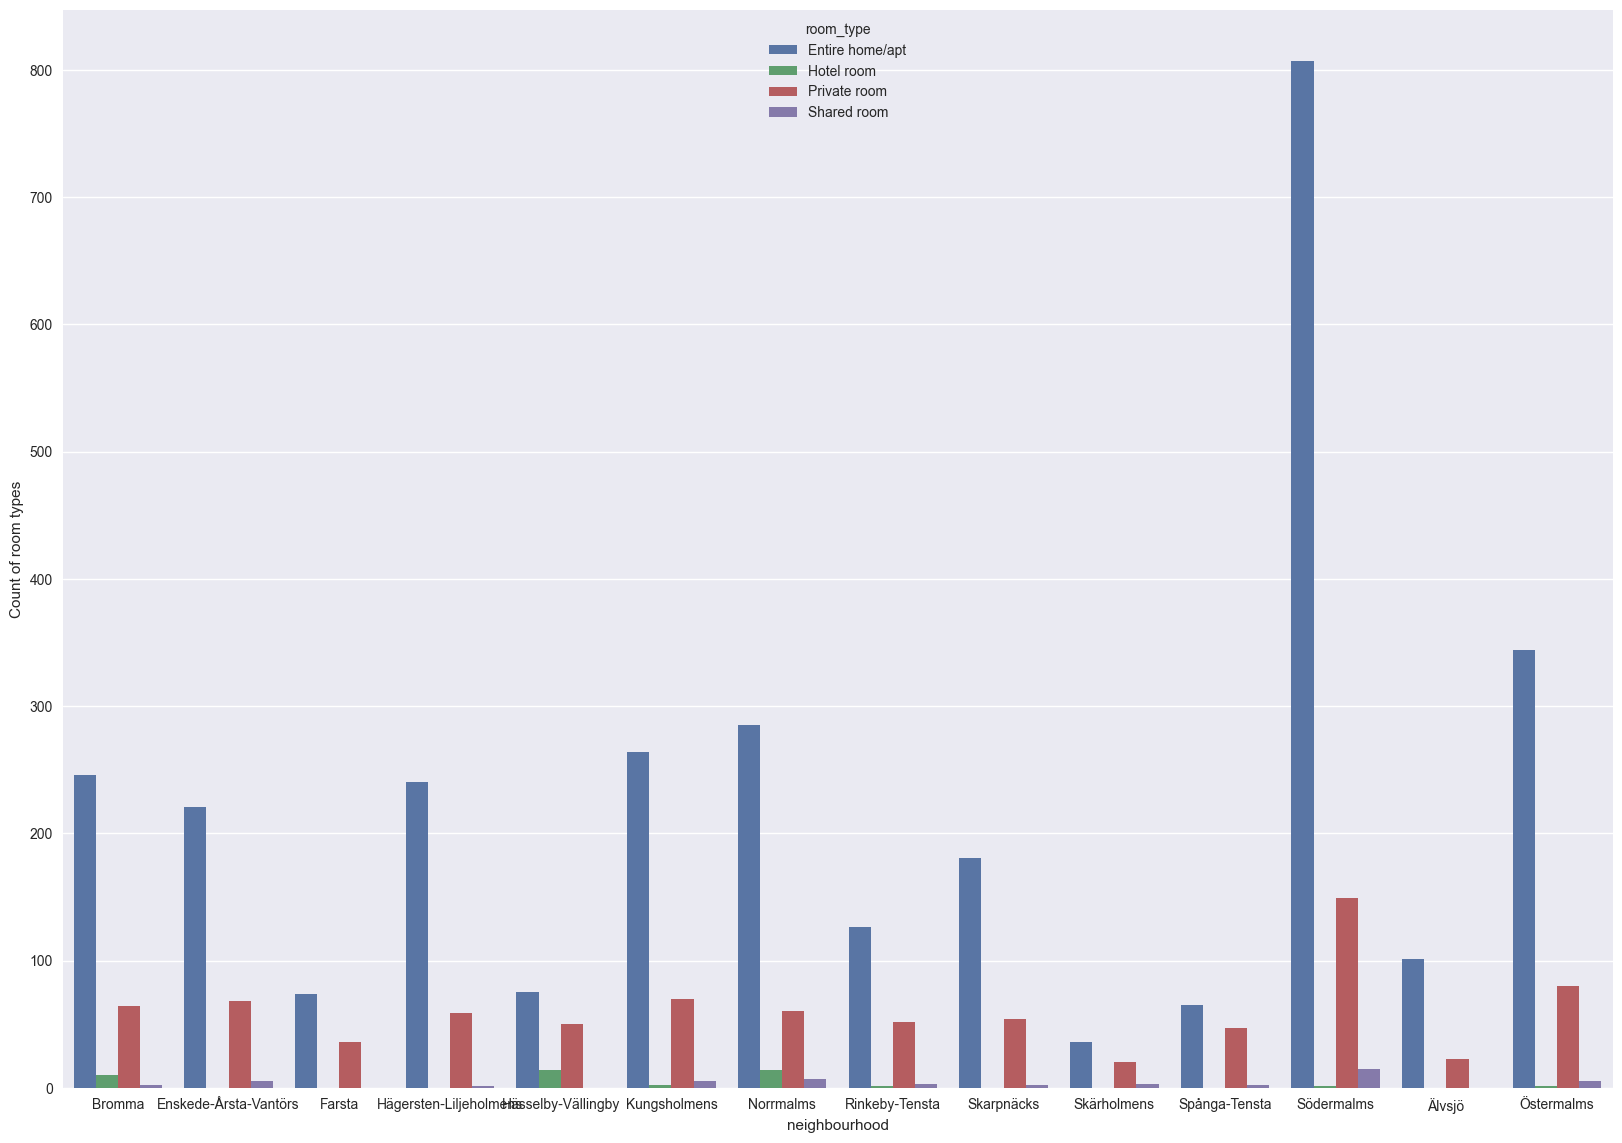

In [9]:
#Total listings by neighbourhood and room type
neighbourhood_room = pd.DataFrame(listing_new.groupby(['neighbourhood','room_type'])['price'].count()).reset_index()
plt.figure(figsize=(20, 14))

sns.barplot(data=neighbourhood_room,
            x = 'neighbourhood',
            y = 'price',
            hue = 'room_type')

plt.ylabel('Count of room types')

plt.show()

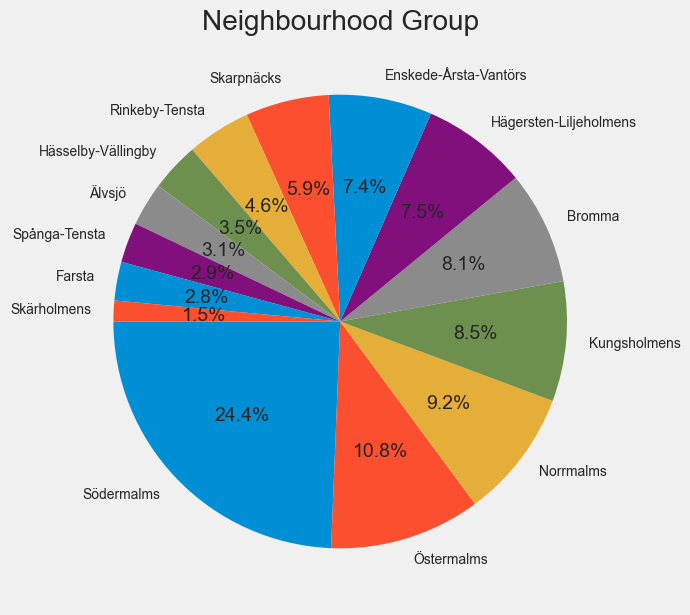

In [12]:
#Neighborhood group
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(listing_new.neighbourhood.value_counts(), labels=listing_new.neighbourhood.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()



Price

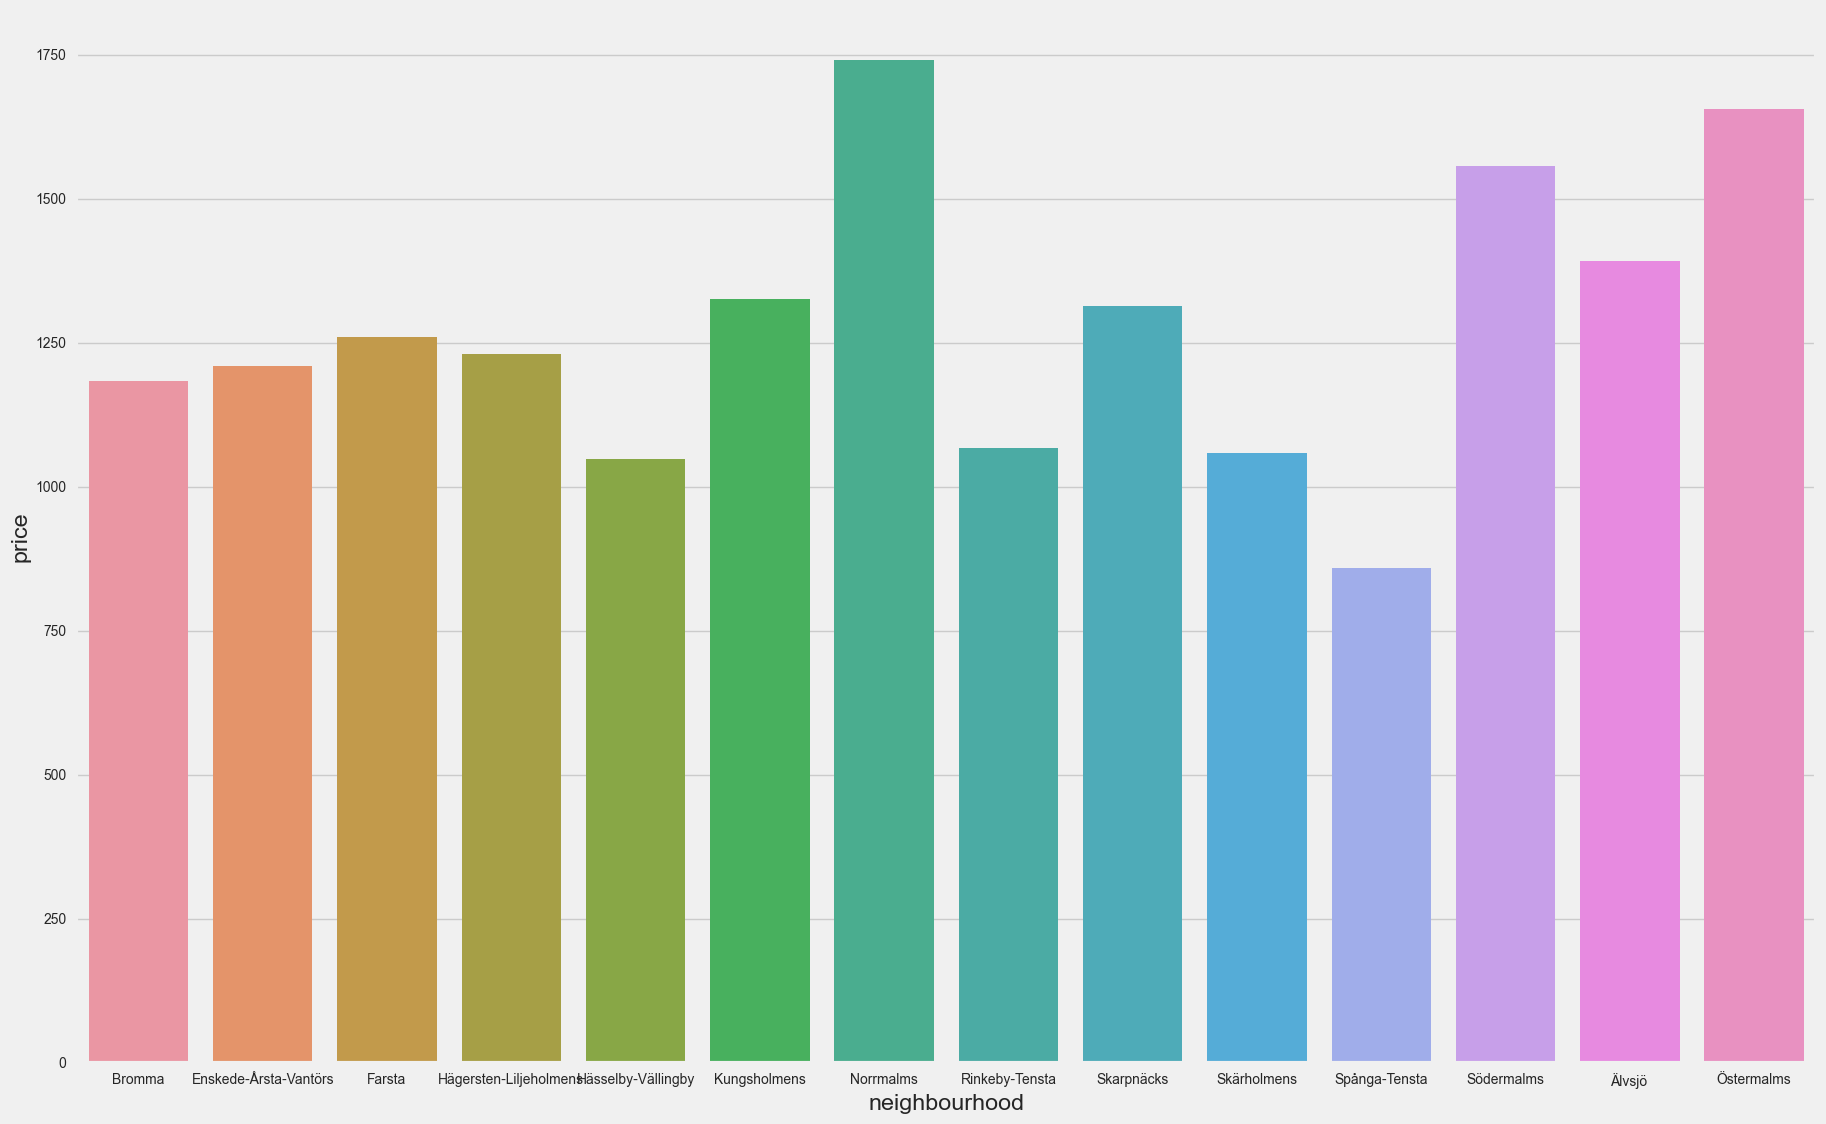

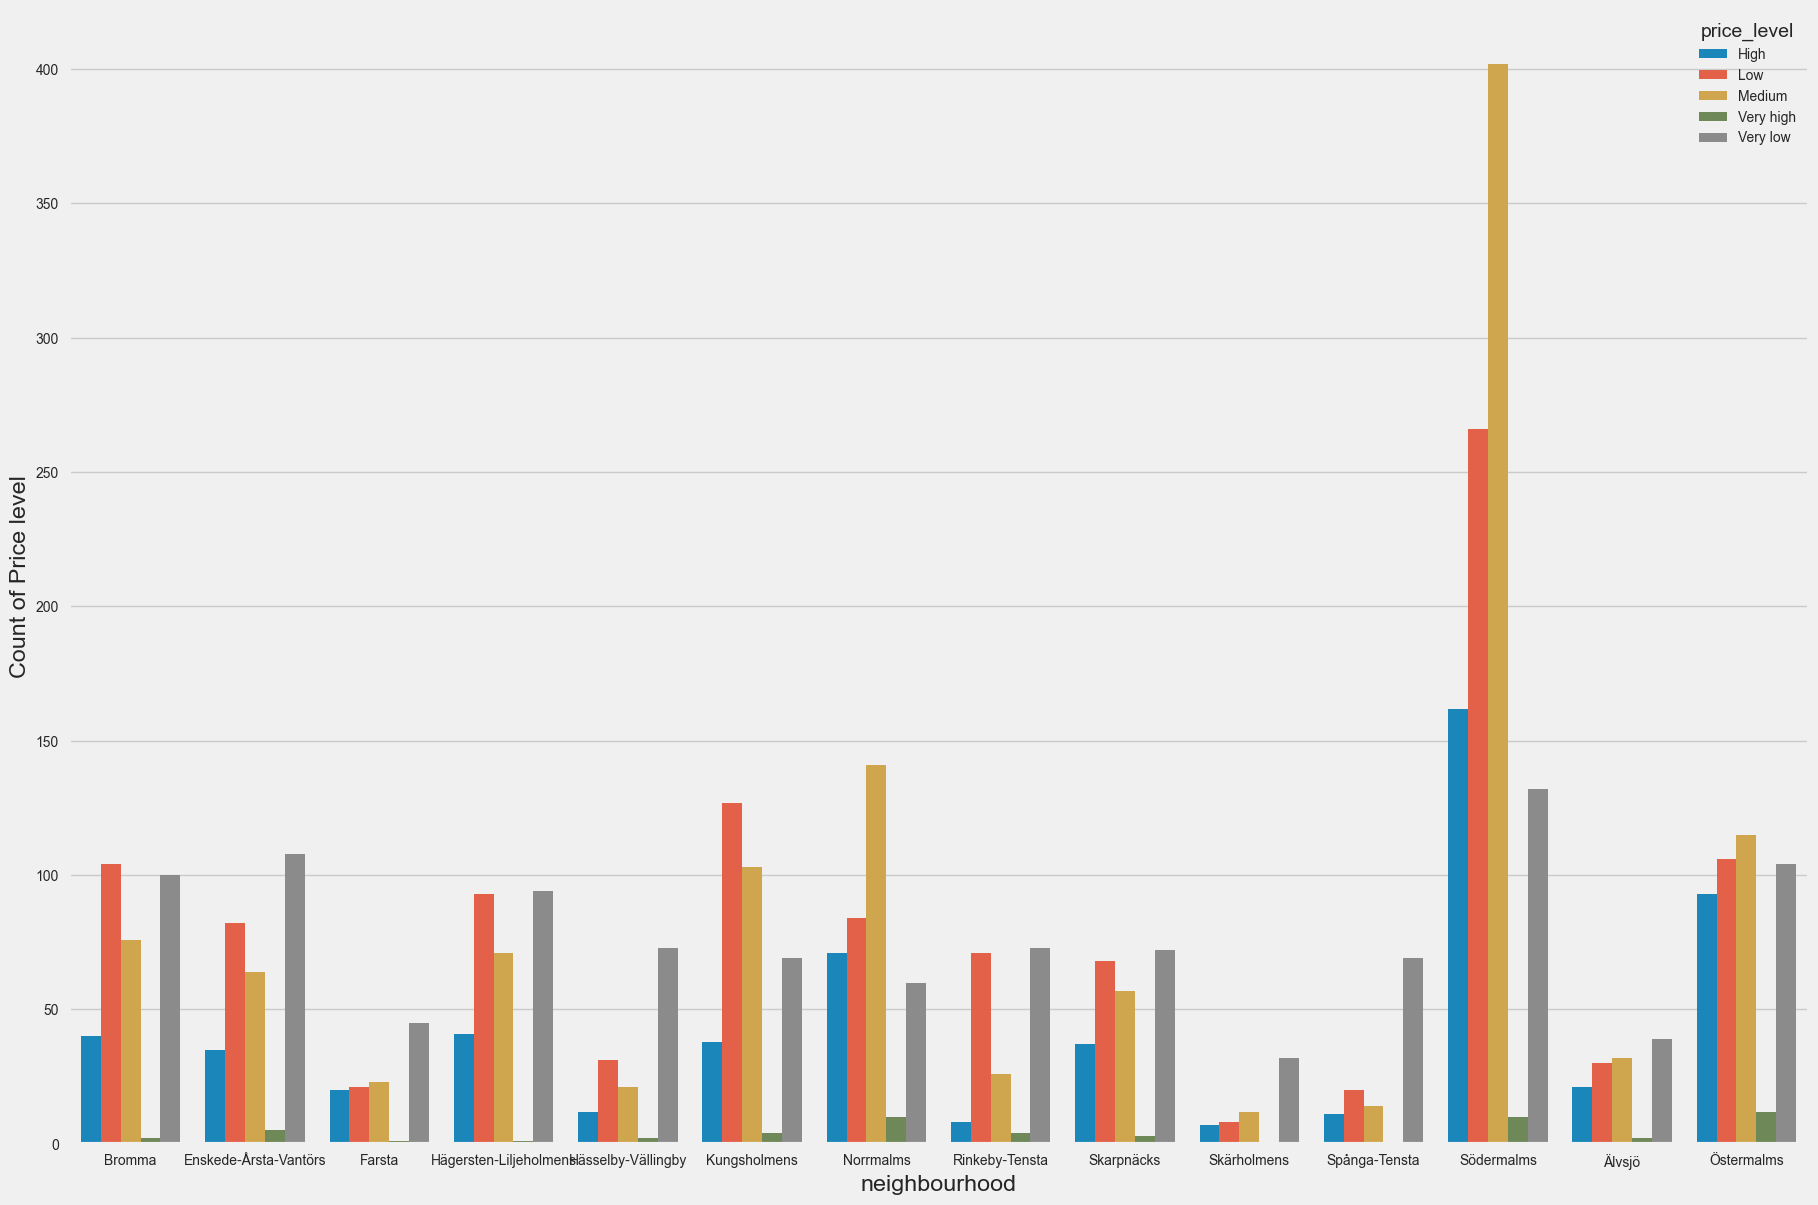

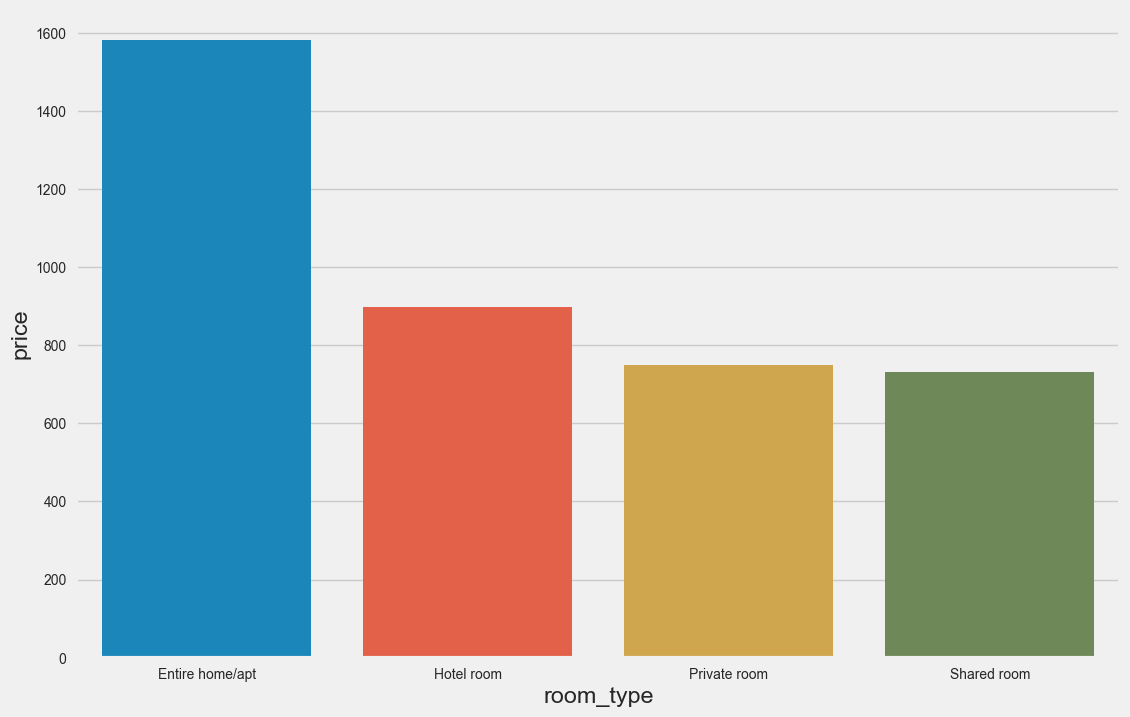

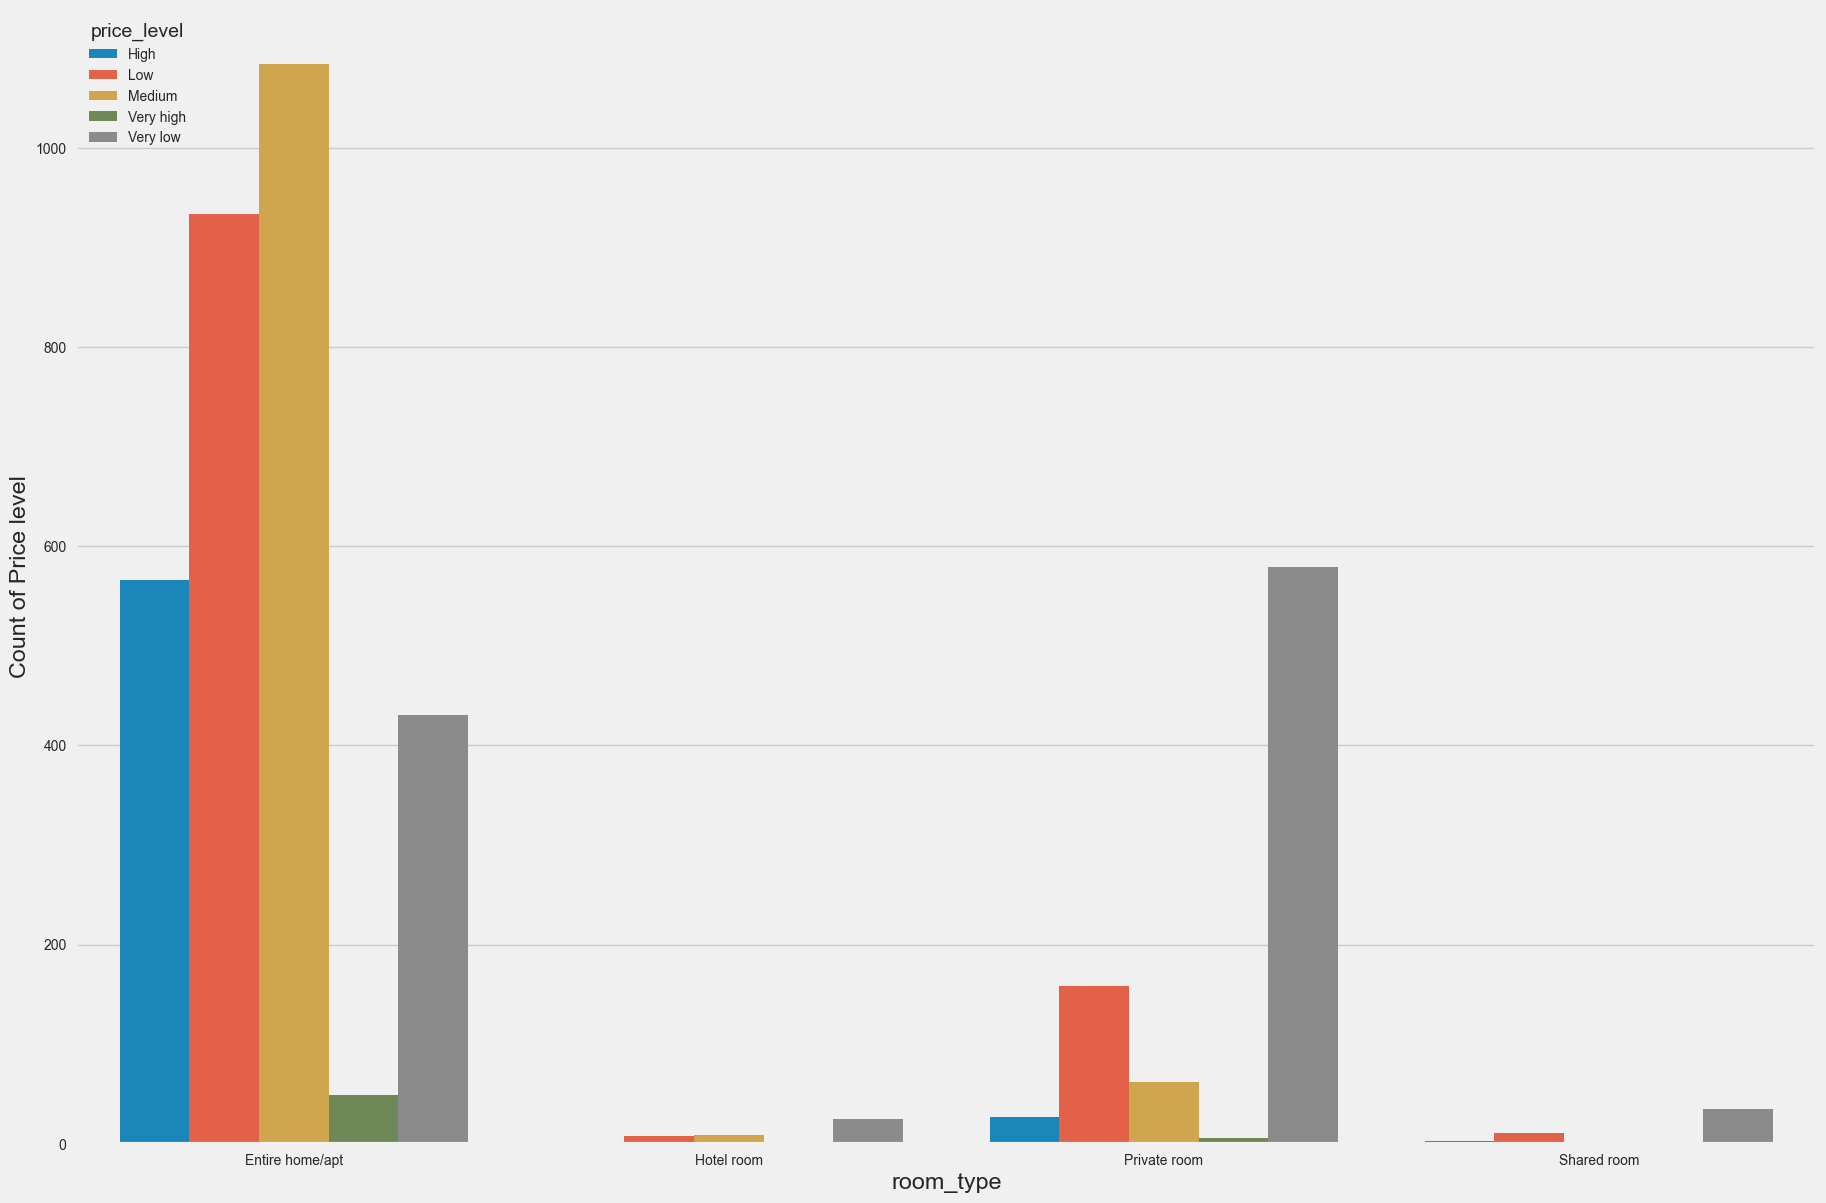

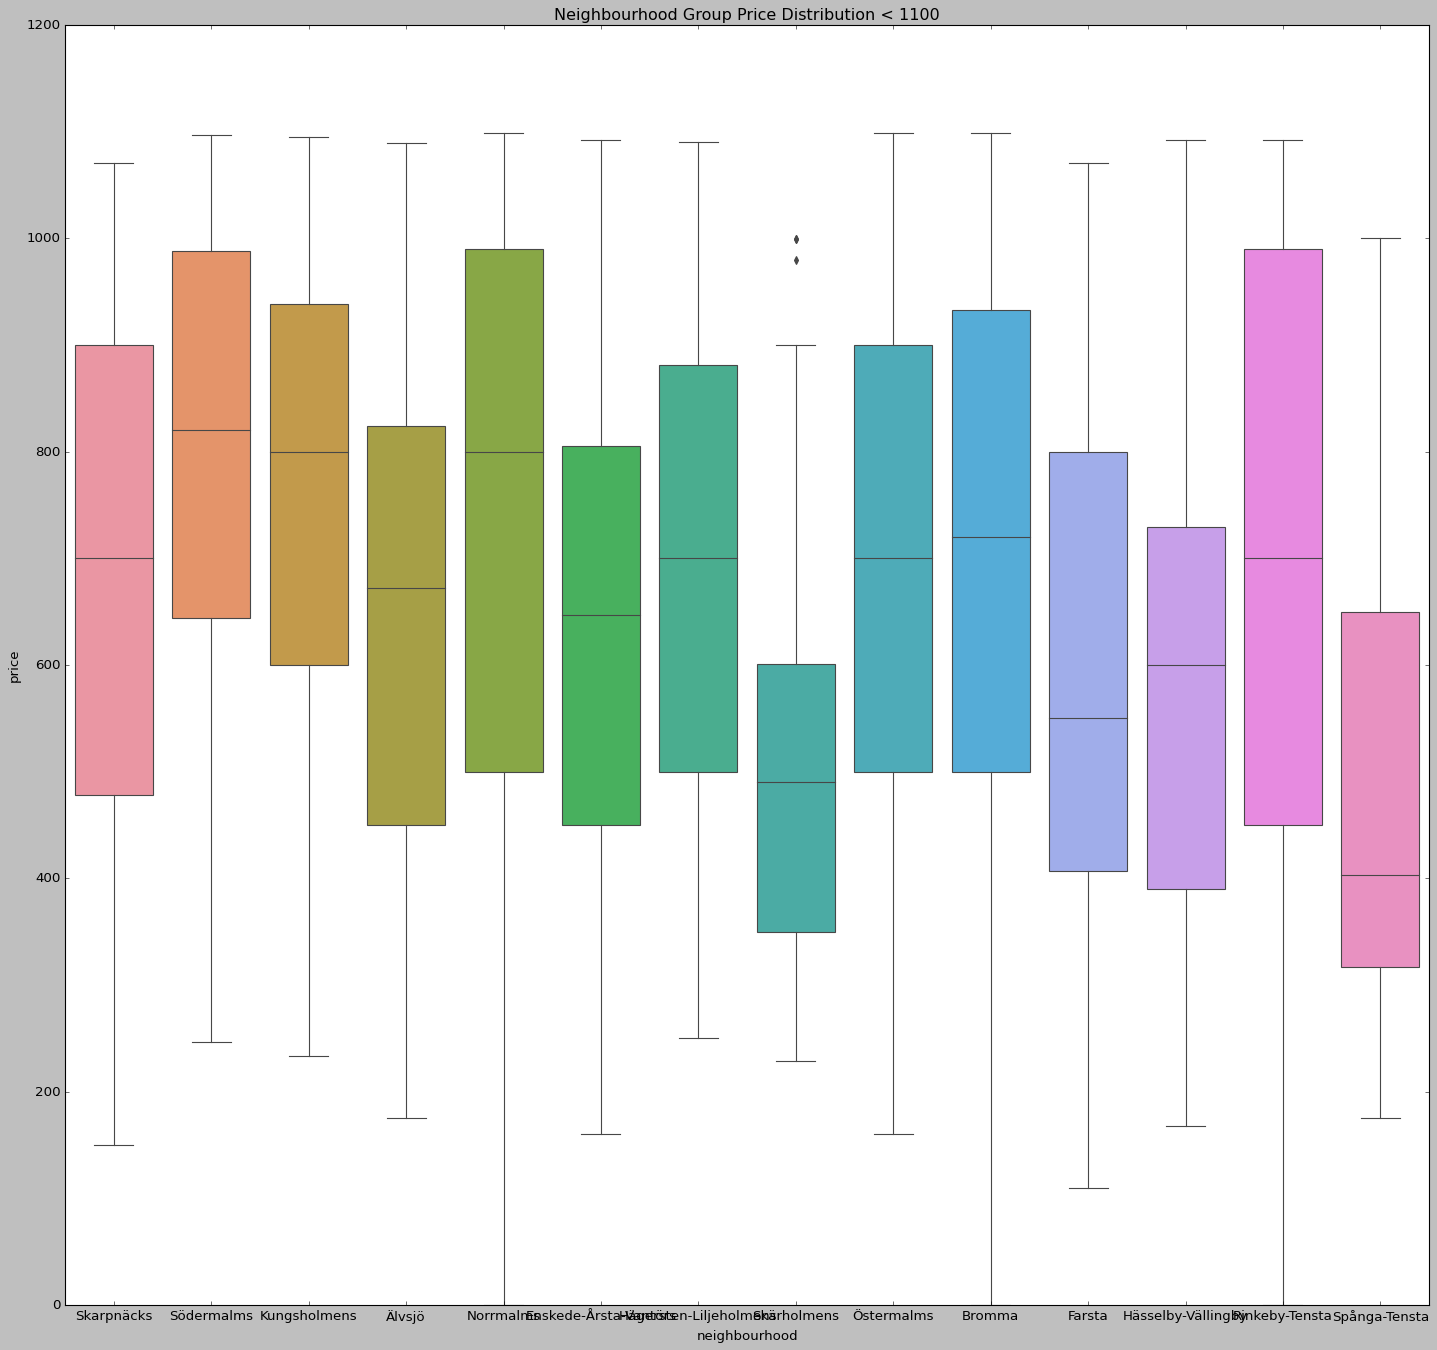

In [13]:
#PRice
neighborhood_price = pd.DataFrame(listing_new.groupby('neighbourhood')['price'].mean()).reset_index()
plt.figure(figsize=(20, 13))

sns.barplot(data=neighborhood_price,
            x = 'neighbourhood',
            y = 'price')

plt.show()

#Price level by Neighbourhood
neighborhood_price_level = pd.DataFrame(listing_new.groupby(['neighbourhood','price_level'])['price'].count()).reset_index()
plt.figure(figsize=(20, 14))

sns.barplot(data=neighborhood_price_level,
            x = 'neighbourhood',
            y = 'price',
            hue = 'price_level')

plt.ylabel('Count of Price level')

plt.show()

#Price by room type
room_price = pd.DataFrame(listing_new.groupby('room_type')['price'].mean()).reset_index()
plt.figure(figsize=(12, 8))

sns.barplot(data=room_price,
            x = 'room_type',
            y = 'price')

plt.show()

#Price level by room type
room_price_level = pd.DataFrame(listing_new.groupby(['room_type','price_level'])['price'].count()).reset_index()
plt.figure(figsize=(20, 14))

sns.barplot(data=room_price_level,
            x = 'room_type',
            y = 'price',
            hue = 'price_level')

plt.ylabel('Count of Price level')

plt.show()

plt.style.use('classic')
plt.figure(figsize=(22,20))
plt.title("Neighbourhood Group Price Distribution < 1100")
sns.boxplot(y="price",x ='neighbourhood' ,data = listing_new[listing_new.price<1100])
plt.show()


Reliability

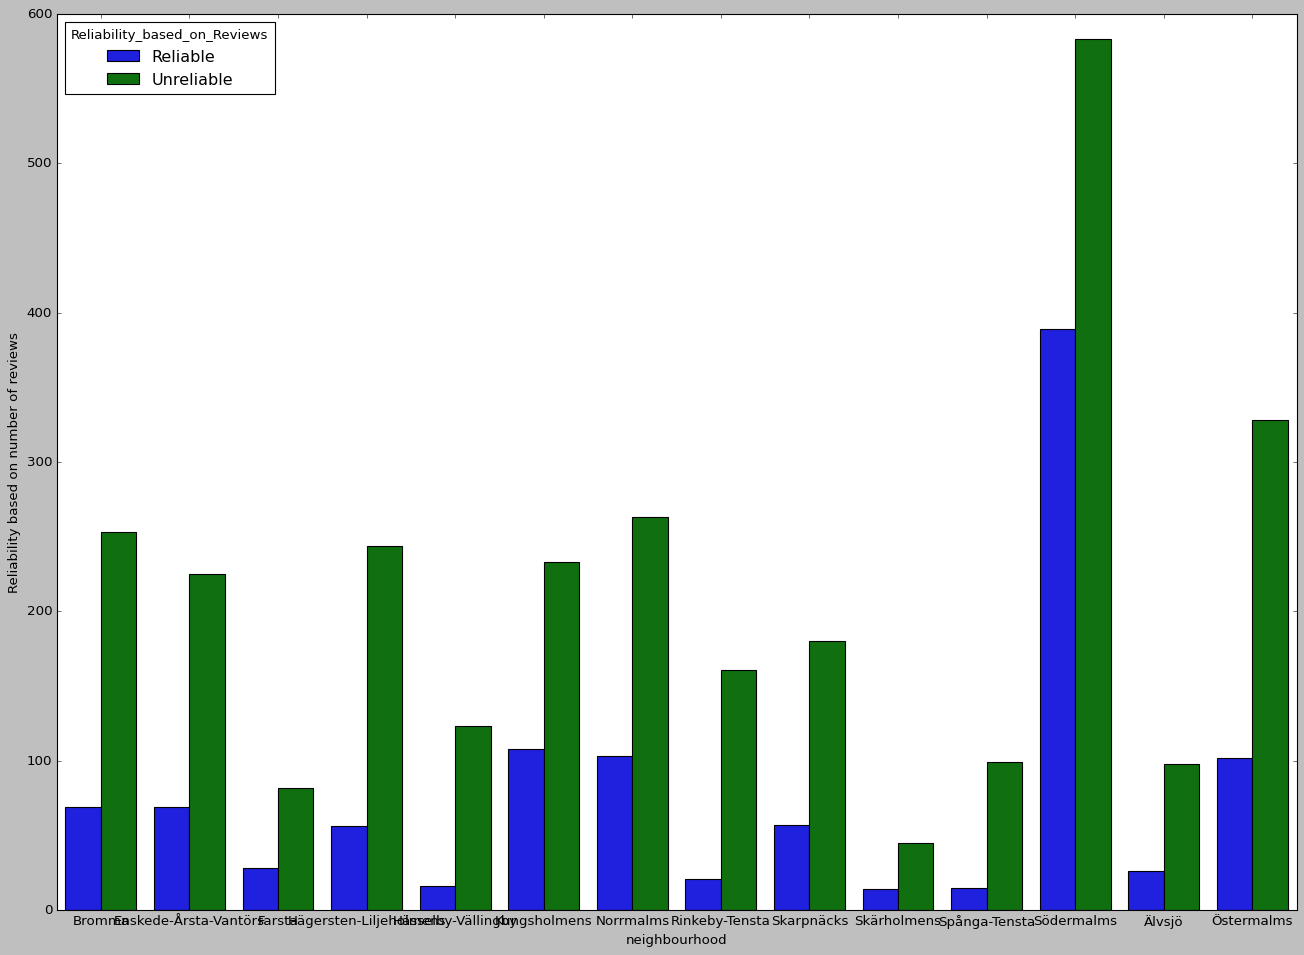

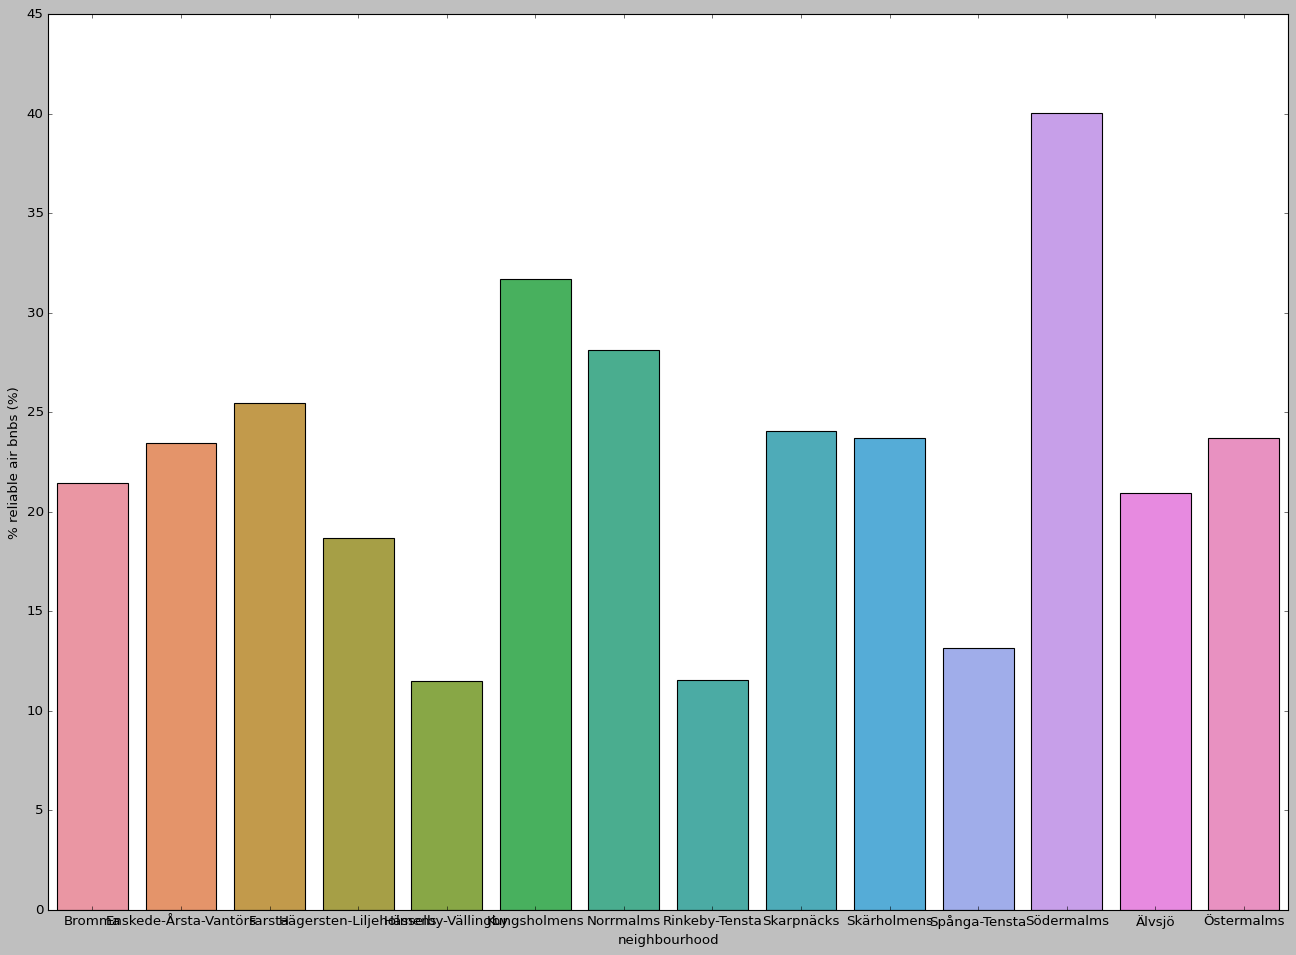

In [14]:
#Reliability and number of reviews
Neighborhood_Reliability = pd.DataFrame(listing_new.groupby(['neighbourhood','Reliability_based_on_Reviews'])['number_of_reviews'].count()).reset_index()
plt.figure(figsize=(20, 14))

sns.barplot(data= Neighborhood_Reliability,
            x = 'neighbourhood',
            y = 'number_of_reviews',
            hue = 'Reliability_based_on_Reviews')

plt.ylabel('Reliability based on number of reviews')

plt.show()

#Graph: % number of reviews of Air BnBs that are "reliable" by Neighborhood
Neighborhood_Reliability['Review_rate'] = (Neighborhood_Reliability['number_of_reviews'] / Neighborhood_Reliability.groupby(['neighbourhood'])['number_of_reviews'].transform('sum'))*100
Neighborhood_Reliability_Reliable = Neighborhood_Reliability[Neighborhood_Reliability['Reliability_based_on_Reviews'] == "Reliable"]

plt.figure(figsize=(20, 14))

sns.barplot(data= Neighborhood_Reliability_Reliable,
            x = 'neighbourhood',
            y = 'Review_rate',
            )

plt.ylabel('% reliable air bnbs (%)')

plt.show()

Availability

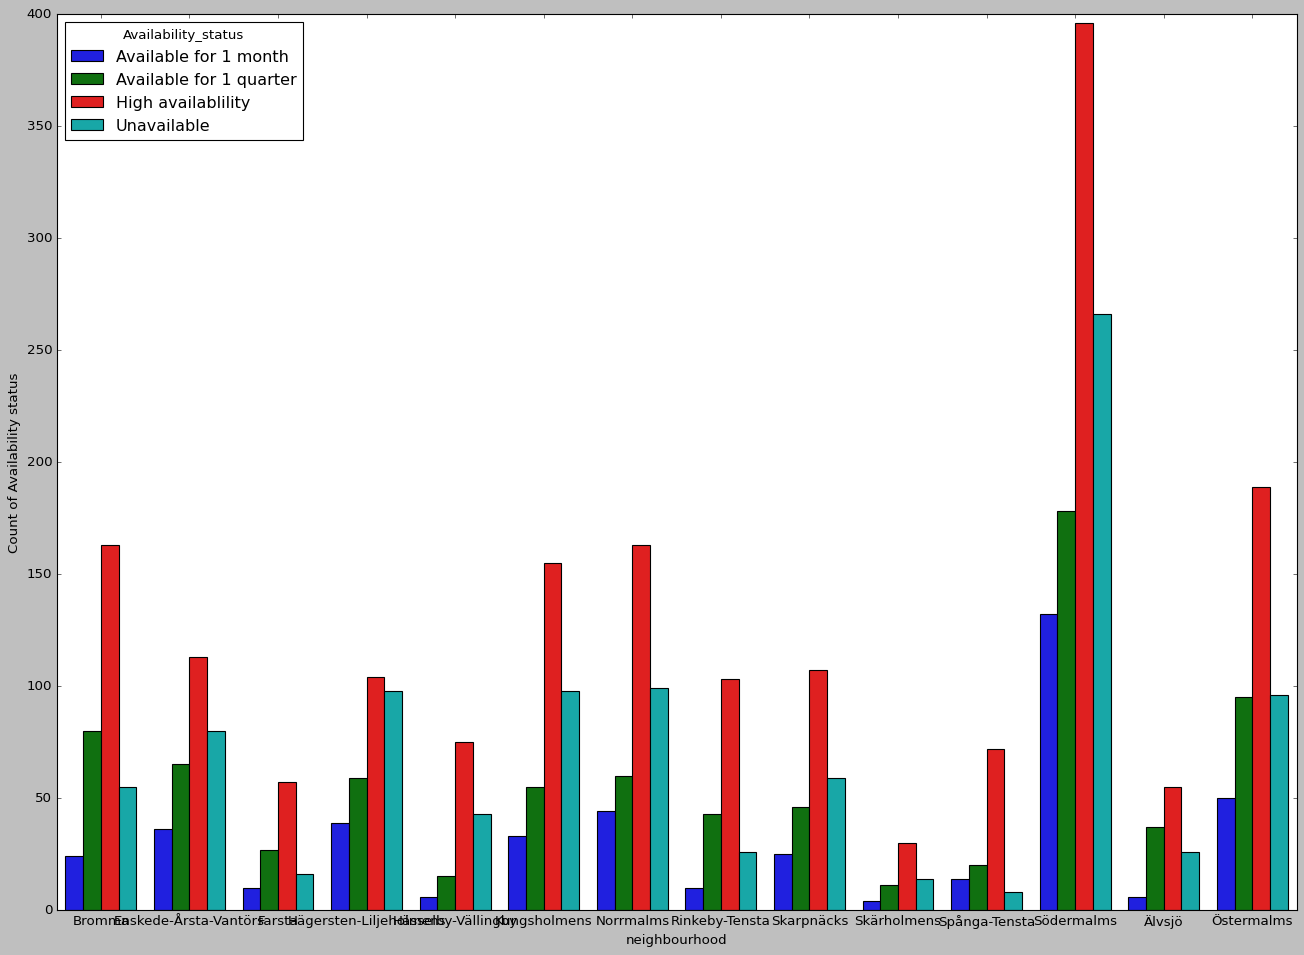

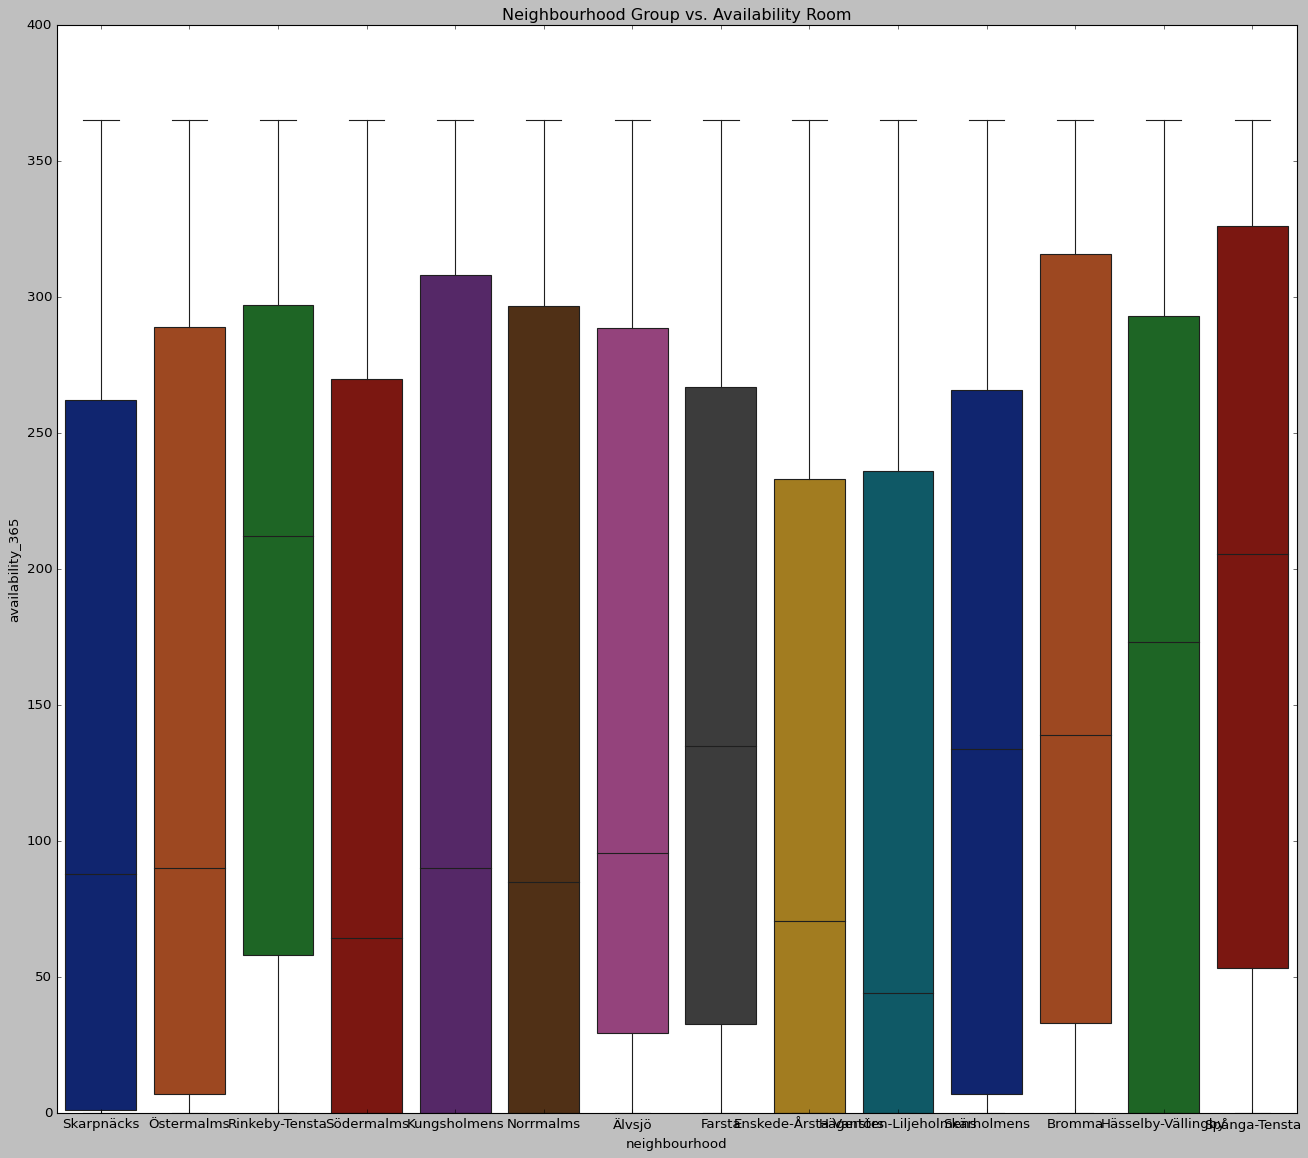

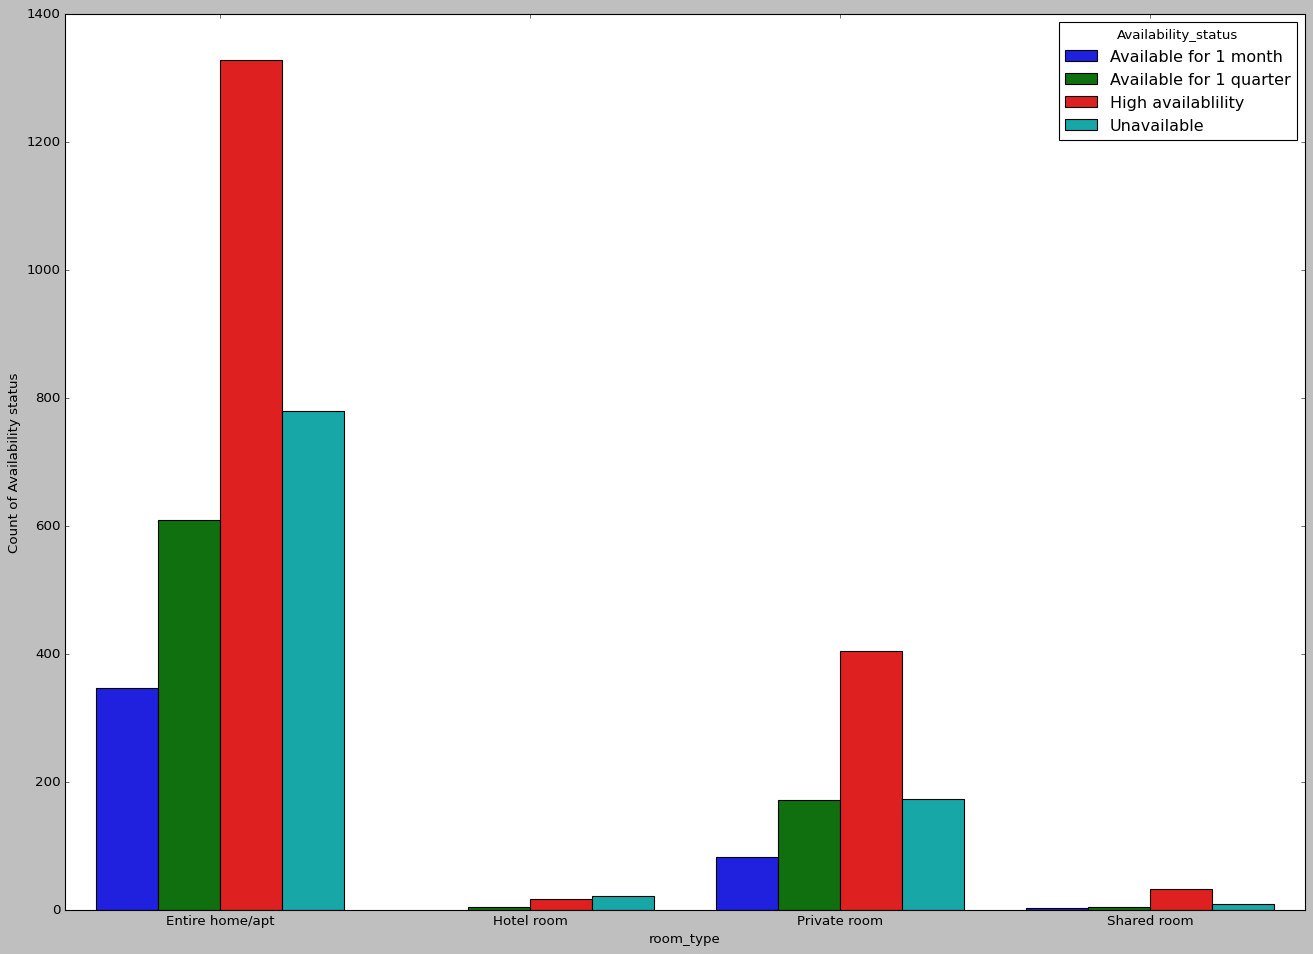

In [15]:
neighborhood_avail_status = pd.DataFrame(listing_new.groupby(['neighbourhood','Availability_status'])['availability_365'].count()).reset_index()
plt.figure(figsize=(20, 14))

sns.barplot(data=neighborhood_avail_status,
            x = 'neighbourhood',
            y = 'availability_365',
            hue = 'Availability_status')

plt.ylabel('Count of Availability status')

plt.show()

plt.style.use('classic')
plt.figure(figsize=(20,17))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=listing_new, x='neighbourhood',y='availability_365',palette="dark")
plt.show()

room_avail_status = pd.DataFrame(listing_new.groupby(['room_type','Availability_status'])['availability_365'].count()).reset_index()
plt.figure(figsize=(20, 14))

sns.barplot(data=room_avail_status,
            x = 'room_type',
            y = 'availability_365',
            hue = 'Availability_status')

plt.ylabel('Count of Availability status')

plt.show()
